In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
!which python

/home/clepore/.conda/envs/general_python3/bin/python


In [3]:
import Nio
import glob

In [4]:
!ls /Data2/SubX/ESRL/fim199901/


hfls_sfc_FIM_06jan1999_00z_d01_d32_m01.nc
hfls_sfc_FIM_06jan1999_00z_d01_d32_m02.nc
hfls_sfc_FIM_06jan1999_00z_d01_d32_m03.nc
hfls_sfc_FIM_06jan1999_00z_d01_d32_m04.nc
hfls_sfc_FIM_13jan1999_00z_d01_d32_m01.nc
hfls_sfc_FIM_13jan1999_00z_d01_d32_m02.nc
hfls_sfc_FIM_13jan1999_00z_d01_d32_m03.nc
hfls_sfc_FIM_13jan1999_00z_d01_d32_m04.nc
hfls_sfc_FIM_20jan1999_00z_d01_d32_m01.nc
hfls_sfc_FIM_20jan1999_00z_d01_d32_m02.nc
hfls_sfc_FIM_20jan1999_00z_d01_d32_m03.nc
hfls_sfc_FIM_20jan1999_00z_d01_d32_m04.nc
hfls_sfc_FIM_27jan1999_00z_d01_d32_m01.nc
hfls_sfc_FIM_27jan1999_00z_d01_d32_m02.nc
hfls_sfc_FIM_27jan1999_00z_d01_d32_m03.nc
hfls_sfc_FIM_27jan1999_00z_d01_d32_m04.nc
hfss_sfc_FIM_06jan1999_00z_d01_d32_m01.nc
hfss_sfc_FIM_06jan1999_00z_d01_d32_m02.nc
hfss_sfc_FIM_06jan1999_00z_d01_d32_m03.nc
hfss_sfc_FIM_06jan1999_00z_d01_d32_m04.nc
hfss_sfc_FIM_13jan1999_00z_d01_d32_m01.nc
hfss_sfc_FIM_13jan1999_00z_d01_d32_m02.nc
hfss_sfc_FIM_13jan1999_00z_d01_d32_m03.nc
hfss_sfc_FIM_13jan1999_00z_d01_d32

In [5]:
!ncdump -h /Data2/SubX/ESRL/fim199901/pr_sfc_FIM_06jan1999_00z_d01_d32_m01.nc

netcdf pr_sfc_FIM_06jan1999_00z_d01_d32_m01 {
dimensions:
	time = UNLIMITED ; // (32 currently)
	lat = 181 ;
	lon = 360 ;
variables:
	double time(time) ;
		time:long_name = "time" ;
		time:units = "days since 1999-01-06 00:00:00" ;
		time:calendar = "JULIAN" ;
	double lat(lat) ;
		lat:long_name = "latitude" ;
		lat:units = "degrees_north" ;
	double lon(lon) ;
		lon:long_name = "longitude" ;
		lon:units = "degrees_east" ;
	float pr(time, lat, lon) ;
		pr:long_name = "precipitation_flux" ;
		pr:units = "kg m^2 s^-1" ;
		pr:cell_method = "time: point" ;
		pr:vartyp = "scalar" ;
		pr:cell_methods = "time: mean" ;

// global attributes:
		:Created_by = "fim2nc" ;
		:Created_at_yyyymmdd = "20160912" ;
		:Created_at_hhmmss = "210521" ;
		:GMT_offset = "-0000" ;
		:ncout.F90_rev = "$Rev$" ;
		:case = "fim" ;
		:model = "fim" ;
		:levels = "L64" ;
		:native_grid = "hex" ;
		:equation = "hydro" ;
		:description = "none" ;
		:interp = "True" ;
		:interp_method = "bilinear" ;
		:real_kind = 4 ;
		

In [6]:
!ncdump -h /Data2/SubX/ESRL/fim199901/tas_2m_FIM_06jan1999_00z_d01_d32_m01.nc

netcdf tas_2m_FIM_06jan1999_00z_d01_d32_m01 {
dimensions:
	lat = 181 ;
	lon = 360 ;
	time = UNLIMITED ; // (32 currently)
variables:
	double lat(lat) ;
		lat:long_name = "latitude" ;
		lat:units = "degrees_north" ;
	double lon(lon) ;
		lon:long_name = "longitude" ;
		lon:units = "degrees_east" ;
	float tas(time, lat, lon) ;
		tas:long_name = "air_temperature" ;
		tas:units = "K" ;
		tas:cell_method = "time: point" ;
		tas:vartyp = "scalar" ;
		tas:cell_methods = "time: mean" ;
	double time(time) ;
		time:long_name = "time" ;
		time:units = "days since 1999-01-06 00:00:00" ;
		time:calendar = "JULIAN" ;

// global attributes:
		:Created_by = "fim2nc" ;
		:Created_at_yyyymmdd = "20160912" ;
		:Created_at_hhmmss = "210521" ;
		:GMT_offset = "-0000" ;
		:ncout.F90_rev = "$Rev$" ;
		:case = "fim" ;
		:model = "fim" ;
		:levels = "L64" ;
		:native_grid = "hex" ;
		:equation = "hydro" ;
		:description = "none" ;
		:interp = "True" ;
		:interp_method = "bilinear" ;
		:real_kind = 4 ;
		:ArchvT

In [7]:
ds = xr.open_dataset('/Data2/SubX/ESRL/fim199901/pr_sfc_FIM_06jan1999_00z_d01_d32_m01.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 32)
Coordinates:
  * time     (time) datetime64[ns] 1999-01-06T12:00:00 ... 1999-02-06T12:00:00
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    Created_by:           fim2nc
    Created_at_yyyymmdd:  20160912
    Created_at_hhmmss:    210521
    GMT_offset:           -0000
    ncout.F90_rev:        $Rev$
    case:                 fim
    model:                fim
    levels:               L64
    native_grid:          hex
    equation:             hydro
    description:          none
    interp:               True
    interp_method:        bilinear
    real_kind:            4
    ArchvTimeUnit:        hr
    ArchvIntvl:           6
    fixedgridorder:       False
    history:              Mon Sep 12 21:10:02 2016: ncks -A pv.nc nopv2.nc\nM...
   

####  The start time is at 00z the lead times at 12z - I am going to ignore this for the time being since I look at some accumulated/maximum weekly value

In [58]:
def ppf2(ds):
    ds.coords['S'] = 'S', np.atleast_1d(ds.time[0].values - np.timedelta64(12, 'h'))
    ds.rename({'time':'L'}, inplace=True)
    ds.coords['L']=((ds.L-ds.S)/ np.timedelta64(1,'D')).squeeze()
    ds = ds.sel(lat=slice(32,42),lon=slice(-103+360,-90+360))
#     print(ds.lat.values)
#     print(ds.lon.values)
    ds.coords['lat'] = np.round(ds.lat.values)
    ds.coords['lon'] = np.round(ds.lon.values)
    return ds

In [9]:
import os


"/Data2/SubX/ESRL/fim199901/"
"/Data2/SubX/ESRL/fim199901/pr_sfc_FIM_06jan1999_00z_d01_d32_m01.nc" #precip
"/Data2/SubX/ESRL/fim199901/tas_2m_FIM_06jan1999_00z_d01_d32_m01.nc" #air temp
"/Data2/SubX/ESRL/fim199901/tdps_2m_FIM_06jan1999_00z_d01_d32_m02.nc" #dew point
#no cape available
'/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(6)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc'
'/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(7)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc'
'/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(8)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc'

In [56]:
# varname = 'pr_sfc'
# ds_Y = []
# for iy in np.arange(1999, 2015):
#     ds_M = []
#     for ensnum in np.arange(1,5):
#         print ('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(6)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc')
#         print ('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(7)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc')
#         print ('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(8)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc')


In [59]:
varname = 'pr_sfc'
ds_Y = []
for iy in np.arange(1999, 2015):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(6)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(7)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(8)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_allpr = xr.concat(ds_Y, dim='S')
del ds_Y
ds_allpr.S


[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32. 

[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32. 

[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32.         33.         34.         34.99999237 36.         37.
 38.         39.         40.         41.         42.        ]
[257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.]
[32. 

KeyboardInterrupt: 

In [12]:
varname = 'tas_2m'
ds_Y = []
for iy in np.arange(1999, 2015):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(6)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(7)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(8)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_alltas_2m = xr.concat(ds_Y, dim='S')
del ds_Y
# print ds_alltas_2m.nbytes/1e9
ds_alltas_2m.S

<xarray.DataArray 'S' (S: 210)>
array(['1999-06-02T00:00:00.000000000', '1999-06-09T00:00:00.000000000',
       '1999-06-16T00:00:00.000000000', ..., '2014-08-13T00:00:00.000000000',
       '2014-08-20T00:00:00.000000000', '2014-08-27T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2014-08-20 2014-08-27

In [13]:
varname = 'tdps_2m'
ds_Y = []
for iy in np.arange(1999, 2015):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(6)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(7)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
#         ds_M.append(pr_S)
#         del pr_S
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        mylist = glob.glob('/Data2/SubX/ESRL/fim'+np.str(iy)+'0'+np.str(8)+'/'+varname+'_*_m0'+np.str(ensnum)+'.nc') 
        pr_S1=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S1.coords['M'] = 'M', np.atleast_1d(ensnum)
        pr_S = pr_S.merge(pr_S1)
        del pr_S1
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_alltdps_2m = xr.concat(ds_Y, dim='S')
del ds_Y
# print ds_alltdps_2m.nbytes/1e9
ds_alltdps_2m.S

<xarray.DataArray 'S' (S: 210)>
array(['1999-06-02T00:00:00.000000000', '1999-06-09T00:00:00.000000000',
       '1999-06-16T00:00:00.000000000', ..., '2014-08-13T00:00:00.000000000',
       '2014-08-20T00:00:00.000000000', '2014-08-27T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2014-08-20 2014-08-27

In [14]:
whos


Variable        Type        Data/Info
-------------------------------------
Nio             module      <module 'Nio' from '/home<...>e-packages/PyNIO/Nio.py'>
calendar        module      <module 'calendar' from '<...>b/python3.6/calendar.py'>
date            type        <class 'datetime.date'>
datetime        type        <class 'datetime.datetime'>
ds              Dataset     <xarray.Dataset>\nDimensi<...>O:                  4.4.5
ds_allpr        Dataset     <xarray.Dataset>\nDimensi<...>O:                  4.4.5
ds_alltas_2m    Dataset     <xarray.Dataset>\nDimensi<...>O:                  4.4.5
ds_alltdps_2m   Dataset     <xarray.Dataset>\nDimensi<...>O:                  4.4.5
ensnum          int64       4
glob            module      <module 'glob' from '/hom<...>3/lib/python3.6/glob.py'>
iy              int64       2014
mylist          list        n=4
np              module      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
os              module      <module 'os' from '/h

# MERGE THEM IN ONE DATAARRAY

In [15]:
ds_allpr.merge(ds_alltas_2m, inplace=True)

<xarray.Dataset>
Dimensions:  (L: 32, M: 4, S: 210, lat: 11, lon: 14)
Coordinates:
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 27.5 28.5 29.5 30.5 31.5
  * lat      (lat) float64 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * lon      (lon) float64 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * M        (M) int64 1 2 3 4
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2014-08-20 2014-08-27
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(4, 210, 32, 11, 14), chunksize=(1, 1, 32, 11, 14)>
    tas      (M, S, L, lat, lon) float32 dask.array<shape=(4, 210, 32, 11, 14), chunksize=(1, 1, 32, 11, 14)>
Attributes:
    Created_by:           fim2nc
    Created_at_yyyymmdd:  20160913
    Created_at_hhmmss:    004106
    GMT_offset:           -0000
    ncout.F90_rev:        $Rev$
    case:                 fim
    model:                fim
    levels:               L64
    native_grid:          hex
    equation:             hydro
   

In [16]:
ds_allpr.merge(ds_alltdps_2m, inplace=True)

<xarray.Dataset>
Dimensions:  (L: 32, M: 4, S: 210, lat: 11, lon: 14)
Coordinates:
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 27.5 28.5 29.5 30.5 31.5
  * lat      (lat) float64 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * lon      (lon) float64 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * M        (M) int64 1 2 3 4
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2014-08-20 2014-08-27
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(4, 210, 32, 11, 14), chunksize=(1, 1, 32, 11, 14)>
    tas      (M, S, L, lat, lon) float32 dask.array<shape=(4, 210, 32, 11, 14), chunksize=(1, 1, 32, 11, 14)>
    tdps     (M, S, L, lat, lon) float32 dask.array<shape=(4, 210, 32, 11, 14), chunksize=(1, 1, 32, 11, 14)>
Attributes:
    Created_by:           fim2nc
    Created_at_yyyymmdd:  20160913
    Created_at_hhmmss:    004106
    GMT_offset:           -0000
    ncout.F90_rev:        $Rev$
    case:                 fim
    model:     

In [17]:
del ds_alltas_2m
del ds_alltdps_2m


In [62]:
ds_allpr.lon

<xarray.DataArray 'lon' (lon: 14)>
array([257., 258., 259., 260., 261., 262., 263., 264., 265., 266., 267., 268.,
       269., 270.])
Coordinates:
  * lon      (lon) float64 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
Attributes:
    long_name:  longitude
    units:      degrees_east

# SELECT LEAD TIMES

In [18]:
week1 = ds_allpr.sel(L=slice(1.5,7.5))
week1 = week1.stack(MSll=('M','S','lat','lon','L')).compute()
week1

<xarray.Dataset>
Dimensions:  (MSll: 905520)
Coordinates:
  * MSll     (MSll) MultiIndex
  - M        (MSll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
  - S        (MSll) datetime64[ns] 1999-06-02 1999-06-02 ... 1999-06-02
  - lat      (MSll) float64 32.0 32.0 32.0 32.0 32.0 ... 32.0 32.0 32.0 32.0
  - lon      (MSll) float64 257.0 257.0 257.0 257.0 ... 260.0 260.0 261.0 261.0
  - L        (MSll) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 4.5 5.5 6.5 7.5 1.5 2.5
Data variables:
    pr       (MSll) float32 2.2940164e-06 1.6251136e-06 ... 9.099445e-06
    tas      (MSll) float32 302.60007 302.35855 301.2143 ... 298.31534 299.58817
    tdps     (MSll) float32 285.5406 282.85953 272.81882 ... 295.68655 295.93362
Attributes:
    Created_by:           fim2nc
    Created_at_yyyymmdd:  20160913
    Created_at_hhmmss:    004106
    GMT_offset:           -0000
    ncout.F90_rev:        $Rev$
    case:                 fim
    model:                fim
    levels:               L64
    

In [19]:
week1.coords['MSll'] = np.arange(0,905520) 
week1

<xarray.Dataset>
Dimensions:  (MSll: 905520)
Coordinates:
  * MSll     (MSll) int64 0 1 2 3 4 5 ... 905515 905516 905517 905518 905519
Data variables:
    pr       (MSll) float32 2.2940164e-06 1.6251136e-06 ... 9.099445e-06
    tas      (MSll) float32 302.60007 302.35855 301.2143 ... 298.31534 299.58817
    tdps     (MSll) float32 285.5406 282.85953 272.81882 ... 295.68655 295.93362
Attributes:
    Created_by:           fim2nc
    Created_at_yyyymmdd:  20160913
    Created_at_hhmmss:    004106
    GMT_offset:           -0000
    ncout.F90_rev:        $Rev$
    case:                 fim
    model:                fim
    levels:               L64
    native_grid:          hex
    equation:             hydro
    description:          none
    interp:               True
    interp_method:        bilinear
    real_kind:            4
    ArchvTimeUnit:        hr
    ArchvIntvl:           6
    fixedgridorder:       False
    history:              Tue Sep 13 00:45:24 2016: ncks -A pv.nc nopv2

In [20]:
# plt.hist(week1.tas.values.ravel())

step = 2.
to_bin = lambda x: np.round(x / step) * step
week1["tasb"] = to_bin(week1.tas)
# 

# plt.hist(week1.tasb.values.ravel(),bins=20)

In [201]:
grouped1 = week1[['pr','tasb']].groupby('tasb')
ds_group = grouped1.max()
ds_group.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group.quantiles.values),len(ds_group.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped1):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group['pr_q'].loc[dict(tasb=k)] = var

ds_group


0 (1,)
1 (17,)
2 (162,)
3 (1199,)
4 (4790,)
5 (14597,)
6 (30415,)
7 (50581,)
8 (83518,)
9 (138082,)
10 (184928,)
11 (175799,)
12 (126160,)
13 (67153,)
14 (24552,)
15 (3468,)
16 (98,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 17)
Coordinates:
  * tasb       (tasb) float64 280.0 282.0 284.0 286.0 ... 308.0 310.0 312.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tasb) float64 9.451e-05 0.0002245 ... 1.892e-05 5.751e-06
    pr_q       (quantiles, tasb) float64 0.0 0.0 0.0 ... 4.057e-05 1.783e-05 0.0

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


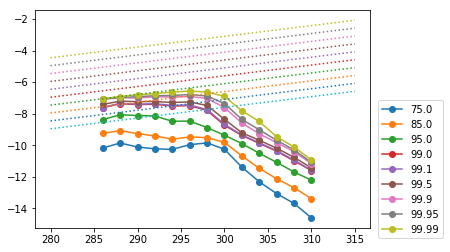

In [202]:
plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-28,-23,0.5):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':')


In [23]:
week2 = ds_allpr.sel(L=slice(8.5,14.5))
week2 = week2.stack(MSll=('M','S','lat','lon','L')).compute()
week2

<xarray.Dataset>
Dimensions:  (MSll: 905520)
Coordinates:
  * MSll     (MSll) MultiIndex
  - M        (MSll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
  - S        (MSll) datetime64[ns] 1999-06-02 1999-06-02 ... 1999-06-02
  - lat      (MSll) float64 32.0 32.0 32.0 32.0 32.0 ... 32.0 32.0 32.0 32.0
  - lon      (MSll) float64 257.0 257.0 257.0 257.0 ... 260.0 260.0 261.0 261.0
  - L        (MSll) float64 8.5 9.5 10.5 11.5 12.5 ... 12.5 13.5 14.5 8.5 9.5
Data variables:
    pr       (MSll) float32 6.995852e-05 6.4092055e-05 2.3382654e-05 ... 0.0 0.0
    tas      (MSll) float32 299.09885 297.55286 298.00565 ... 288.6636 290.6162
    tdps     (MSll) float32 288.48615 289.89462 288.75305 ... 281.6006 283.1139
Attributes:
    Created_by:           fim2nc
    Created_at_yyyymmdd:  20160913
    Created_at_hhmmss:    004106
    GMT_offset:           -0000
    ncout.F90_rev:        $Rev$
    case:                 fim
    model:                fim
    levels:               L64


In [24]:
week2.coords['MSll'] = np.arange(0,905520) 

In [203]:
# plt.hist(week2.tas.values.ravel())

step = 2.
to_bin = lambda x: np.round(x / step) * step
week2["tasb"] = to_bin(week2.tas)
# 

# plt.hist(week2.tasb.values.ravel(),bins=20)

In [204]:
grouped2 = week2[['pr','tasb']].groupby('tasb')
ds_group2 = grouped2.max()
ds_group2.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group2['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group2.quantiles.values),len(ds_group2.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped2):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group2['pr_q'].loc[dict(tasb=k)] = var

ds_group2


0 (1,)
1 (8,)
2 (53,)
3 (295,)
4 (1280,)
5 (4607,)
6 (12272,)
7 (26105,)
8 (46361,)
9 (76979,)
10 (137435,)
11 (199679,)
12 (180562,)
13 (124832,)
14 (66340,)
15 (24318,)
16 (4222,)
17 (169,)
18 (2,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 19)
Coordinates:
  * tasb       (tasb) float64 278.0 280.0 282.0 284.0 ... 310.0 312.0 314.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tasb) float64 0.0001922 0.0003473 ... 1.149e-05 2.862e-07
    pr_q       (quantiles, tasb) float64 0.0 0.0 0.0 0.0 ... 2.025e-05 0.0 0.0

Text(0, 0.5, '$lnI$')

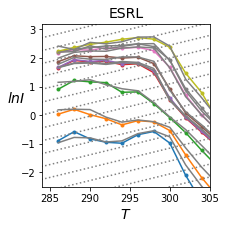

In [210]:
# plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
# plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# # plt.xlim((287,315))
# for iim in np.arange(-39,-23,0.4):
#     plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':', color='grey')
    
# plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q.T),'-', color='grey')
# plt.legend(ds_group2.quantiles.values, loc=3,bbox_to_anchor=(1.01,0))
# # plt.xlim((287,315))
# plt.title('ESRL')
# plt.ylim((-12,-6))
# plt.xlim((282,312))

plt.figure(figsize=(3,3))
plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T*86400/8),'.-')
plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q.T*86400/8),'-', color='grey')
# plt.xlim((287,315))
for iim in np.arange(-31,-13,0.45):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':', color='grey')
plt.title('ESRL', fontsize=14)
plt.ylim((-2.5,3.2))
plt.xlim((284,305))
# plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
plt.xlabel(r'$T$', fontsize=14)
plt.ylabel(r'$lnI$', rotation=0, fontsize=14)

In [28]:
# week3 = ds_allpr.sel(L=slice(15.5,21.5))

In [211]:
step = 2.
to_bin = lambda x: np.round(x / step) * step
week1["tdpsb"] = to_bin(week1.tdps)

grouped1 = week1[['pr','tdpsb']].groupby('tdpsb')
ds_group = grouped1.max()
ds_group.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group['pr_q'] = (('quantiles','tdpsb'), np.zeros((len(ds_group.quantiles.values),len(ds_group.tdpsb.values)))) 
for iim, (k, gp) in enumerate(grouped1):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group['pr_q'].loc[dict(tdpsb=k)] = var

ds_group

step = 2.
to_bin = lambda x: np.round(x / step) * step
week2["tdpsb"] = to_bin(week2.tdps)
grouped2 = week2[['pr','tdpsb']].groupby('tdpsb')
ds_group2 = grouped2.max()
ds_group2.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group2['pr_q'] = (('quantiles','tdpsb'), np.zeros((len(ds_group2.quantiles.values),len(ds_group2.tdpsb.values)))) 
for iim, (k, gp) in enumerate(grouped2):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group2['pr_q'].loc[dict(tdpsb=k)] = var

ds_group2

0 (19,)
1 (61,)
2 (128,)
3 (306,)
4 (766,)
5 (1261,)
6 (2171,)
7 (3543,)
8 (6520,)
9 (11295,)
10 (20056,)
11 (35300,)
12 (56582,)
13 (82121,)
14 (104174,)
15 (116534,)
16 (118380,)
17 (114436,)
18 (120420,)
19 (92390,)
20 (18661,)
21 (396,)
0 (11,)
1 (58,)
2 (174,)
3 (322,)
4 (616,)
5 (1216,)
6 (2627,)
7 (4798,)
8 (8658,)
9 (15979,)
10 (29380,)
11 (51540,)
12 (80241,)
13 (104684,)
14 (118755,)
15 (120379,)
16 (118218,)
17 (122399,)
18 (100878,)
19 (24111,)
20 (476,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tdpsb: 21)
Coordinates:
  * tdpsb      (tdpsb) float64 260.0 262.0 264.0 266.0 ... 296.0 298.0 300.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tdpsb) float64 0.0 0.0 6.098e-11 ... 0.00207 0.001795 0.0002594
    pr_q       (quantiles, tdpsb) float64 0.0 0.0 0.0 ... 0.001508 0.001539 0.0

Text(0, 0.5, '$lnI$')

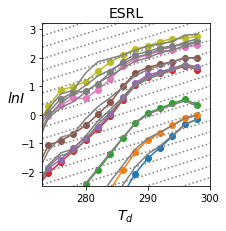

In [214]:
# plt.plot(ds_group.tdpsb,np.log(ds_group.pr_q.T),'o-')
# plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# # plt.xlim((287,315))
# for iim in np.arange(-35,-23,0.75):
#     plt.plot(np.array([265,315]),iim+0.068*np.array([265,315]),':', color='grey')
    
# plt.plot(ds_group2.tdpsb,np.log(ds_group2.pr_q.T),'-', color='grey')
# plt.legend(ds_group2.quantiles.values, loc=3,bbox_to_anchor=(1.01,0))
# # plt.xlim((287,315))
# plt.title('ESRL')
# plt.ylim((-16,-6))
# plt.xlim((265,300))

plt.figure(figsize=(3,3))
plt.plot(ds_group.tdpsb,np.log(ds_group.pr_q.T*86400/8),'o-')
plt.plot(ds_group2.tdpsb,np.log(ds_group2.pr_q.T*86400/8),'-', color='grey')
# plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-31,-13,0.4):
    plt.plot(np.array([270,315]),iim+0.068*np.array([270,315]),':', color='grey')
plt.title('ESRL', fontsize=14)
plt.ylim((-2.5,3.2))
plt.xlim((273,300))
# plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
plt.xlabel(r'$T_d$', fontsize=14)
plt.ylabel(r'$lnI$', rotation=0, fontsize=14)

# LOGISTIC REGRESSION

In [155]:
week1lr_all = ds_allpr.sel(L=slice(1.5,7.5)) 
#I drop the first value, L=0.5,  but the target time of this is still the week starting at 0.
week1lr_all = week1lr_all.stack(Mll=('M','lat','lon')).compute()
print(week1lr_all)


<xarray.Dataset>
Dimensions:  (L: 7, Mll: 616, S: 210)
Coordinates:
  * L        (L) float64 1.5 2.5 3.5 4.5 5.5 6.5 7.5
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2014-08-20 2014-08-27
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1
  - lat      (Mll) float64 32.0 32.0 32.0 32.0 32.0 ... 33.0 33.0 33.0 34.0 34.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
Data variables:
    pr       (S, L, Mll) float32 2.2940164e-06 2.4164038e-07 ... 9.099445e-06
    tas      (S, L, Mll) float32 302.60007 301.80542 ... 299.88715 299.58817
    tdps     (S, L, Mll) float32 285.5406 286.0018 ... 295.5226 295.93362
Attributes:
    Created_by:           fim2nc
    Created_at_yyyymmdd:  20160913
    Created_at_hhmmss:    004106
    GMT_offset:           -0000
    ncout.F90_rev:        $Rev$
    case:                 fim
    model:                fim
    levels:               L64
    native_grid:

In [156]:
week1lr = week1lr_all.mean(dim='L')
print(week1lr)

<xarray.Dataset>
Dimensions:  (Mll: 616, S: 210)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2014-08-20 2014-08-27
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1
  - lat      (Mll) float64 32.0 32.0 32.0 32.0 32.0 ... 33.0 33.0 33.0 34.0 34.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
Data variables:
    pr       (S, Mll) float32 6.5571585e-06 1.2739676e-05 ... 6.2307816e-05
    tas      (S, Mll) float32 301.13934 300.51294 ... 297.95645 297.7808
    tdps     (S, Mll) float32 281.9843 287.13745 ... 294.59686 294.53134


# calculate the first target time for each weekly period. I add a 12 hour to use the center value as in INGRID, but really it starts at 00z

In [157]:
week1lr.coords['T']=week1lr['S'].values+np.timedelta64(1,'D')+np.timedelta64(12,'h')
print(week1lr)

<xarray.Dataset>
Dimensions:  (Mll: 616, S: 210, T: 210)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2014-08-20 2014-08-27
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1
  - lat      (Mll) float64 32.0 32.0 32.0 32.0 32.0 ... 33.0 33.0 33.0 34.0 34.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
  * T        (T) datetime64[ns] 1999-06-03T12:00:00 ... 2014-08-28T12:00:00
Data variables:
    pr       (S, Mll) float32 6.5571585e-06 1.2739676e-05 ... 6.2307816e-05
    tas      (S, Mll) float32 301.13934 300.51294 ... 297.95645 297.7808
    tdps     (S, Mll) float32 281.9843 287.13745 ... 294.59686 294.53134


In [158]:
import netCDF4
ds_Y =[]
for iy in np.arange(1999, 2017):
    print( iy)
    url = ('http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/('+
           np.str(iy)+
          ')/VALUES/time/(0000%201%20Jun)/(0000%2011%20Sep)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/')
    print(url)
    ds_temp = xr.open_dataset(url+'dods')
    ds_Y.append(ds_temp)
    del ds_temp
    
ds_NARRpr = xr.concat(ds_Y, dim='time')

1999
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/(1999)/VALUES/time/(0000%201%20Jun)/(0000%2011%20Sep)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/
2000
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/(2000)/VALUES/time/(0000%201%20Jun)/(0000%2011%20Sep)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/
2001
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/(2001)/VALUES/time/(0000%201%20Jun)/(0000%2011%20Sep)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/
2002
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/(2002)/VALUES/time/(0000%201%20Jun)/(0000%2011%20Sep)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/
2003
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/

In [159]:
ds_NARRpr

<xarray.Dataset>
Dimensions:  (lat: 11, lon: 14, time: 1728)
Coordinates:
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * time     (time) datetime64[ns] 1999-06-04T12:00:00 ... 2016-09-07T12:00:00
Data variables:
    apcp     (time, lat, lon) float32 0.029748196 0.17702776 ... 0.92881
Attributes:
    Conventions:  IRIDL

In [160]:
week1lr

<xarray.Dataset>
Dimensions:  (Mll: 616, S: 210, T: 210)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2014-08-20 2014-08-27
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1
  - lat      (Mll) float64 32.0 32.0 32.0 32.0 32.0 ... 33.0 33.0 33.0 34.0 34.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
  * T        (T) datetime64[ns] 1999-06-03T12:00:00 ... 2014-08-28T12:00:00
Data variables:
    pr       (S, Mll) float32 6.5571585e-06 1.2739676e-05 ... 6.2307816e-05
    tas      (S, Mll) float32 301.13934 300.51294 ... 297.95645 297.7808
    tdps     (S, Mll) float32 281.9843 287.13745 ... 294.59686 294.53134

## INGRID GIVE THE CENTER DAY VALUE as time index - so the first value (1-8) has date 4.5 I fix that.


In [161]:
ds_NARRpr.coords['time'] = ds_NARRpr.time-np.timedelta64(3,'D')
ds_NARRpr.time

<xarray.DataArray 'time' (time: 1728)>
array(['1999-06-01T12:00:00.000000000', '1999-06-02T12:00:00.000000000',
       '1999-06-03T12:00:00.000000000', ..., '2016-09-02T12:00:00.000000000',
       '2016-09-03T12:00:00.000000000', '2016-09-04T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1999-06-01T12:00:00 ... 2016-09-04T12:00:00

In [162]:
week1lr["T"]

<xarray.DataArray 'T' (T: 210)>
array(['1999-06-03T12:00:00.000000000', '1999-06-10T12:00:00.000000000',
       '1999-06-17T12:00:00.000000000', ..., '2014-08-14T12:00:00.000000000',
       '2014-08-21T12:00:00.000000000', '2014-08-28T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * T        (T) datetime64[ns] 1999-06-03T12:00:00 ... 2014-08-28T12:00:00

In [163]:
ds_NARRpr_T = ds_NARRpr.sel(time=week1lr["T"])
ds_NARRpr_T.time-ds_NARRpr_T['T']

<xarray.DataArray (T: 210)>
array([0, 0, 0, ..., 0, 0, 0], dtype='timedelta64[ns]')
Coordinates:
    time     (T) datetime64[ns] 1999-06-03T12:00:00 ... 2014-08-28T12:00:00
  * T        (T) datetime64[ns] 1999-06-03T12:00:00 ... 2014-08-28T12:00:00

In [164]:
week1lrStoT = week1lr
week1lrStoT['S'] = week1lrStoT['T'].values
week1lrStoT

<xarray.Dataset>
Dimensions:  (Mll: 616, S: 210, T: 210)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-03T12:00:00 ... 2014-08-28T12:00:00
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1
  - lat      (Mll) float64 32.0 32.0 32.0 32.0 32.0 ... 33.0 33.0 33.0 34.0 34.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
  * T        (T) datetime64[ns] 1999-06-03T12:00:00 ... 2014-08-28T12:00:00
Data variables:
    pr       (S, Mll) float32 6.5571585e-06 1.2739676e-05 ... 6.2307816e-05
    tas      (S, Mll) float32 301.13934 300.51294 ... 297.95645 297.7808
    tdps     (S, Mll) float32 281.9843 287.13745 ... 294.59686 294.53134

### plots

(0.05, 0.45)

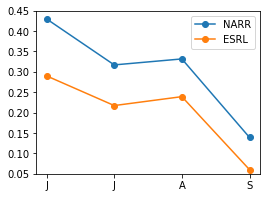

In [165]:
fig = plt.figure(figsize=(4,3))
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']).groupby('time.month').mean(),'-o')
plt.plot(week1lrStoT.mean(dim='Mll').pr.groupby('S.month').mean()*84600/8,'-o') 
plt.legend(('NARR','ESRL'))
plt.xticks((0,1,2,3),('J','J','A','S'))
plt.ylim((0.05,0.45))

Text(0, 0.9, '0.75')

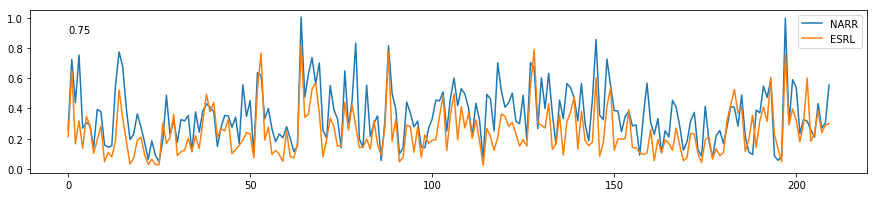

In [166]:
fig = plt.figure(figsize=(15,3))
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']))
plt.plot(week1lrStoT.mean(dim='Mll').pr*84600/8) 
plt.legend(('NARR','ESRL'))
plt.text(0,0.9,
         np.round(np.corrcoef(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),week1lrStoT.mean(dim='Mll').pr*84600/8)[0,1],2))

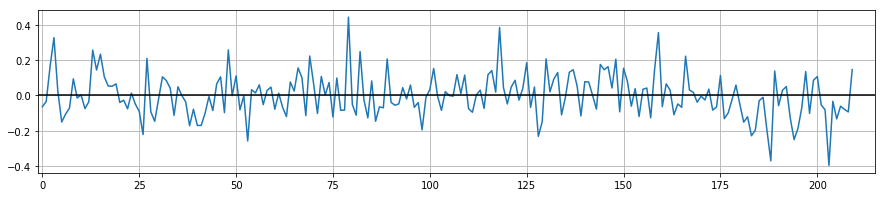

In [256]:
# fig = plt.figure(figsize=(15,3))
# plt.plot((ds_NARRpr_T.apcp.mean(dim=['lat','lon']).values)-(week1lrStoT.mean(dim='Mll').pr.values*84600/8))
# plt.plot((ds_NARRpr_T.apcp.mean(dim=['lat','lon']).rolling(T=12).mean().values)-
#          (week1lrStoT.mean(dim='Mll').pr.rolling(S=12).mean().values*84600/8))

# plt.plot([-1,245],[0,0])
# plt.grid()

fig = plt.figure(figsize=(15,3))
valuesp = (ds_NARRpr_T.apcp.mean(dim=['lat','lon']).values)-(week1lrStoT.mean(dim='Mll').pr.values*84600/8)
plt.plot(valuesp-np.nanmean(valuesp))
# plt.plot([-1,345],[0,0]+np.nanmean(valuesp[0:int(len(valuesp)/2)])-np.nanmean(valuesp))
# plt.plot([-1,345],[0,0]+np.nanmean(valuesp[int(len(valuesp)/2):])-np.nanmean(valuesp))
# plt.plot((ds_NARRpr_T.apcp.mean(dim=['lat','lon']).rolling(T=12).mean().values)-
#          (week1lrStoT.mean(dim='Mll').pr.rolling(S=12).mean().values*84600/8))

plt.plot([-1,345],[0,0],'k')
plt.xlim(-1,215)
plt.grid()

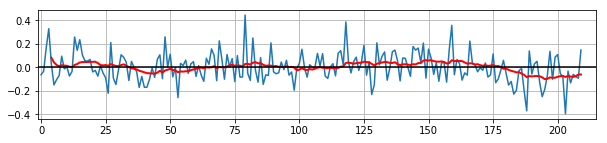

In [259]:
fig = plt.figure(figsize=(10,2))
valuesp = (ds_NARRpr_T.apcp.mean(dim=['lat','lon']).values)-(week1lrStoT.mean(dim='Mll').pr.values*84600/8)
plt.plot(valuesp-np.nanmean(valuesp))
# plt.plot([-1,345],[0,0]+np.nanmean(valuesp[0:int(len(valuesp)/2)])-np.nanmean(valuesp))
# plt.plot([-1,345],[0,0]+np.nanmean(valuesp[int(len(valuesp)/2):])-np.nanmean(valuesp))
valuesp = ((ds_NARRpr_T.apcp.mean(dim=['lat','lon']).rolling(T=20,min_periods=5).mean().values)-
         (week1lrStoT.mean(dim='Mll').pr.rolling(S=20,min_periods=5).mean().values*84600/8))
plt.plot(valuesp-np.nanmean(valuesp),'r-',lw=2)

plt.plot([-1,245],[0,0],'k')
plt.xlim(-1,215)
plt.grid()

Text(0, 0.5, 'ESRL')

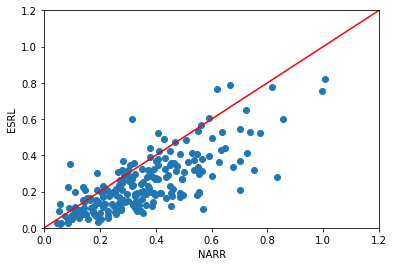

In [167]:
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),week1lr.mean(dim='Mll').pr*84600/8,'o') 
plt.xlim((0,1.2))
plt.ylim((0,1.2))
plt.plot([0,1.5],[0,1.5],'r-')
plt.xlabel('NARR')
plt.ylabel('ESRL')

In [168]:
aa = ds_NARRpr_T.apcp.mean(dim=['lat','lon'])#quantile(q=85.)
quantile_threshold_mean  = aa.quantile(0.85)
quantile_threshold_all  = np.nanpercentile(ds_NARRpr_T.apcp.values.ravel(),85)

Text(0, 0.5, 'ESRL-tdps')

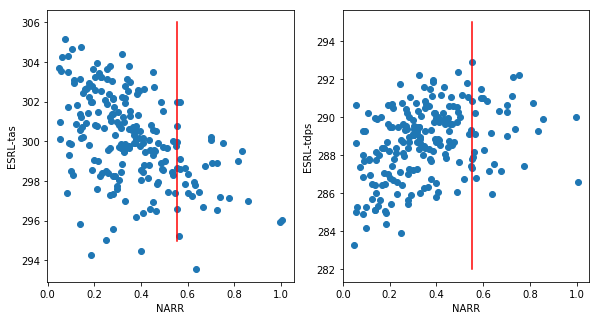

In [169]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),week1lr.mean(dim='Mll').tas,'o') 
plt.plot([quantile_threshold_mean.values,quantile_threshold_mean.values],[295, 306],'r-')
plt.xlabel('NARR')
plt.ylabel('ESRL-tas')
ax = plt.subplot(1,3,2)
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),week1lr.mean(dim='Mll').tdps,'o') 
plt.plot([quantile_threshold_mean.values,quantile_threshold_mean.values],[282, 295],'r-')
plt.xlabel('NARR')
plt.ylabel('ESRL-tdps')
# ax = plt.subplot(1,3,3)
# plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),np.log(week1lr.mean(dim='Mll').CAPE_P1_2L108_GLL0),'o') 
# plt.plot([quantile_threshold_mean.values,quantile_threshold_mean.values],[4, 8],'r-')
# plt.xlabel('NARR')
# plt.ylabel('EMC-cape')

# I have to create a pandas dataframe to do logistic regression so i will manipulate some names and coords

In [170]:
week1lr_us = week1lr.unstack()
print(week1lr_us)
# there is a weird 34.99999999 instead of 35
week1lr_us.coords['lat'] = np.round(week1lr_us.lat.values)

week1lr_us = week1lr_us.drop('T')
print(week1lr_us)
week1lr_us.rename({'S':'T'}, inplace=True)
print(week1lr_us)


<xarray.Dataset>
Dimensions:  (M: 4, S: 210, T: 210, lat: 11, lon: 14)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-03T12:00:00 ... 2014-08-28T12:00:00
  * T        (T) datetime64[ns] 1999-06-03T12:00:00 ... 2014-08-28T12:00:00
  * M        (M) int64 1 2 3 4
  * lat      (lat) float64 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * lon      (lon) float64 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
Data variables:
    pr       (S, M, lat, lon) float32 6.5571585e-06 ... 6.2307816e-05
    tas      (S, M, lat, lon) float32 301.13934 300.51294 ... 297.95645 297.7808
    tdps     (S, M, lat, lon) float32 281.9843 287.13745 ... 294.59686 294.53134
<xarray.Dataset>
Dimensions:  (M: 4, S: 210, lat: 11, lon: 14)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-03T12:00:00 ... 2014-08-28T12:00:00
  * M        (M) int64 1 2 3 4
  * lat      (lat) float64 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * lon      (lon) float64 257.0 258.0 259.0 260.0 ... 267.0 

In [215]:
ds_merged = ds_NARRpr_T.drop('time')

ds_merged = ds_merged.merge(week1lr_us)
ds_merged

<xarray.Dataset>
Dimensions:  (M: 4, T: 210, lat: 11, lon: 14)
Coordinates:
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * T        (T) datetime64[ns] 1999-06-03T12:00:00 ... 2014-08-28T12:00:00
  * M        (M) int64 1 2 3 4
Data variables:
    apcp     (T, lat, lon) float32 0.03734105 0.17766067 ... 0.36307195
    pr       (T, M, lat, lon) float32 6.5571585e-06 ... 6.2307816e-05
    tas      (T, M, lat, lon) float32 301.13934 300.51294 ... 297.95645 297.7808
    tdps     (T, M, lat, lon) float32 281.9843 287.13745 ... 294.59686 294.53134
Attributes:
    Conventions:  IRIDL

# let's repeat the observation #ens times, one per ensemble members


In [216]:
dstemp = ds_merged.apcp.expand_dims(dim='M',axis=1).to_dataset(name='apcp')
ds_merged['apcp_rep']=(('T','M','lat','lon'), np.repeat(dstemp.apcp,4,axis=1))

In [217]:
ds_merged.apcp_rep.lat

<xarray.DataArray 'lat' (lat: 11)>
array([32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.], dtype=float32)
Coordinates:
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
Attributes:
    standard_name:  latitude
    pointwidth:     1.0
    gridtype:       0
    units:          degree_north

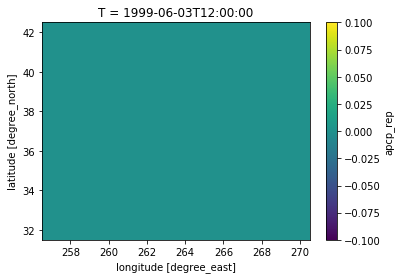

In [218]:
(ds_merged.apcp_rep[0,0]-ds_merged.apcp_rep[0,3]).plot()

In [219]:
ds_merged = ds_merged.mean('M')

In [220]:
df_merged = ds_merged[['apcp_rep','pr','tas','tdps']].to_dataframe()

df_merged = df_merged.reset_index()

In [221]:
ds_merged_mean = ds_merged.mean(dim=['lat','lon'])
df_merged_mean = ds_merged_mean[['apcp_rep','pr','tas','tdps']].to_dataframe()
df_merged_mean = df_merged_mean.reset_index()

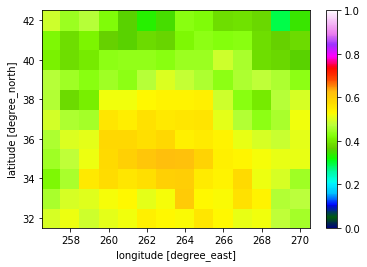

In [223]:
import bottleneck

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])

spearman_correlation(ds_merged.apcp_rep, ds_merged.pr/8.,'T').plot(vmin=0,vmax=1,cmap='gist_ncar')

## Fix units

In [224]:
df_merged['pr']= df_merged['pr']*84600/8 
df_merged_mean['pr']= df_merged_mean['pr']*84600/8 

In [225]:
df_merged['y']=df_merged.apcp_rep>=quantile_threshold_all
df_merged_mean['y']=df_merged_mean.apcp_rep>=quantile_threshold_mean.values

In [241]:
X = df_merged[['pr','tas','tdps','T']]
y = df_merged.loc[:, df_merged.columns == 'y']
X['const']=1

Xm = df_merged_mean[['pr','tas','tdps','T']]
ym = df_merged_mean.loc[:, df_merged_mean.columns == 'y']
Xm['const']=1

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [242]:
def random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,firstmodel,secondmodel):
    AA = ((REAL.values[:,0]-PREDICTION_A.values)**2)**(1/2.)
    BB = ((REAL.values[:,0]-PREDICTION_B.values)**2)**(1/2.)
    better_AA = AA<BB
    better_AA = better_AA.astype(int)
    better_AA[better_AA==0]=-1
    plt.plot(np.cumsum(better_AA), label=secondmodel)
    plt.title(firstmodel)
    plt.legend( bbox_to_anchor=(1, 0))
#     plt.yscale('symlog')
def random_walk_mike_map(TIMEINDEX, REAL, PREDICTION_A, PREDICTION_B,firstmodel,secondmodel):
    df_temp = TIMEINDEX
    df_temp['REAL']=REAL.values[:,0]
    df_temp['PA'] = PREDICTION_A.values
    df_temp['PB'] = PREDICTION_B.values
    AA=np.zeros((pd.unique(df_temp['T']).shape))
    BB=np.zeros((pd.unique(df_temp['T']).shape))
    for ik,(k,gp) in enumerate(df_temp.groupby('T')):
       
        AA[ik] = np.sum((gp.REAL.values-gp.PA.values)**2)
        BB[ik] = np.sum((gp.REAL.values-gp.PB.values)**2)
    better_AA = AA<BB
    better_AA = better_AA.astype(int)
    better_AA[better_AA==0]=-1
    plt.plot(np.cumsum(better_AA), label=secondmodel)
    plt.title(firstmodel)
    plt.legend( bbox_to_anchor=(1, 0))
#     plt.yscale('symlog')

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

Optimization terminated successfully.
         Current function value: 0.372708
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.093      
Dependent Variable: y                AIC:              12057.3618 
Date:               2018-12-17 13:23 BIC:              12072.7436 
No. Observations:   16170            Log-Likelihood:   -6026.7    
Df Model:           1                LL-Null:          -6647.7    
Df Residuals:       16168            LLR p-value:      4.5218e-272
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -2.5061     0.0340   -73.6939   0.0000   -2.5728   -2.4395
pr         2.4505     0.0734    33.3949   0.0

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[[13638     0]
 [ 2532     0]]
0.5


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Optimization terminated successfully.
         Current function value: 0.397333
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.034     
Dependent Variable: y                AIC:              12853.7591
Date:               2018-12-17 13:23 BIC:              12869.1410
No. Observations:   16170            Log-Likelihood:   -6424.9   
Df Model:           1                LL-Null:          -6647.7   
Df Residuals:       16168            LLR p-value:      6.4979e-99
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
           Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const     -31.8775    1.4974  -21.2885  0.0000  -34.8124  -28.9427
tdps        0.1042    0.0052   20.1519  0.0000    0.0940    0.

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[13638     0]
 [ 2532     0]]
0.5
Optimization terminated successfully.
         Current function value: 0.371402
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.097      
Dependent Variable: y                AIC:              12017.1299 
Date:               2018-12-17 13:23 BIC:              12040.2026 
No. Observations:   16170            Log-Likelihood:   -6005.6    
Df Model:           2                LL-Null:          -6647.7    
Df Residuals:       16167            LLR p-value:      1.3498e-279
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const      13.3531     2.4233    5.5103   0.0000    8.6036   18.1027
pr        

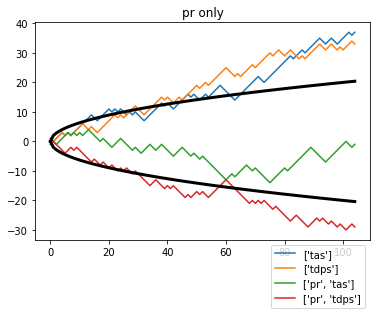

In [249]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)
y_trainT = y_trainT.astype(int)


X_trainT = X[0:int(X.shape[0]/2)]
y_trainT = y[0:int(X.shape[0]/2)].astype(int)
X_testT = X[int(X.shape[0]/2):]
y_testT = y[int(X.shape[0]/2):].astype(int)





# whichytest = y_testT.index
# df_merged_test = df_merged.loc[whichytest]
# ds_merged_test = df_merged_test.set_index(['M','T','lat','lon']).to_xarray().mean('M')
# del df_merged_test
# df_merged_test = ds_merged_test.to_dataframe()
# df_merged_test = df_merged_test.reset_index()
# df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_all
# X_testT = df_merged_test[['pr','tas','tdps']]
# y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
# X_testT['const']=1
# y_testT = y_testT.loc[X_testT.dropna().index]
X_testT = X_testT.dropna()
y_testT = y_testT.astype(int)
REAL = y_testT

varname = ['const','pr']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
model = LogisticRegression(C=1e8)

result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))

print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_A = predictions*1.

varname = ['const','tas']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(metrics.roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.
plt.figure()
random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])


varname = ['const','tdps']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.


random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])


varname=['const','pr','tas'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.


random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])


varname=['const','pr','tdps'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.


random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])
NN = len(pd.unique(X_testT[['T']].values[:,0]))
plt.plot(np.arange(0,NN),2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)
plt.plot(np.arange(0,NN),-2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)

['pr']
[[2.50908707]]
[-2.52745434]
liblinear
Accuracy of logistic regression classifier on test set: 0.85
log loss: 0.3882
0.5350625942271128


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


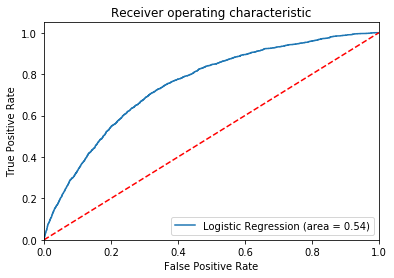

['pr', 'tas']
0
[[ 2.42741773 -0.0085319 ]]
[0.05471403]
Accuracy of logistic regression classifier on test set: 0.85
log loss: 0.3878
0.5342994600927082


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


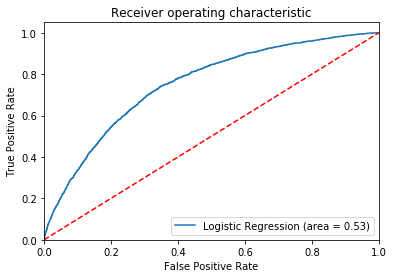

['pr', 'tdps']
0
[[ 2.50948713 -0.00831197]]
[-0.11705876]
Accuracy of logistic regression classifier on test set: 0.85
log loss: 0.3891
0.534390083369899


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


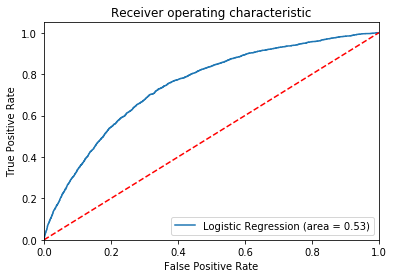

In [230]:

y_test = y_testT
y_train  =y_trainT


varname=['pr' ]   
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
# logreg = LogisticRegression()
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.coef_)
print(logreg.intercept_)
print(logreg.solver)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas'    ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



Optimization terminated successfully.
         Current function value: 0.239396
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.439     
Dependent Variable: y                AIC:              54.2731   
Date:               2018-12-17 13:29 BIC:              59.5810   
No. Observations:   105              Log-Likelihood:   -25.137   
Df Model:           1                LL-Null:          -44.816   
Df Residuals:       103              LLR p-value:      3.5272e-10
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -5.6243     1.0761   -5.2266   0.0000   -7.7334   -3.5152
pr        12.8003     3.0085    4.2548   0.0000    6.9038 

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


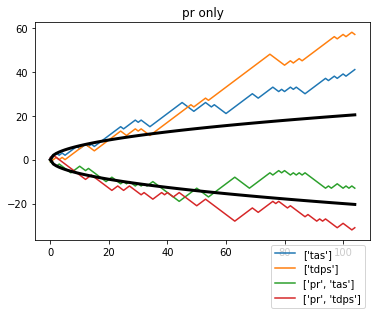

In [251]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
X_trainT, X_testT, y_trainT, y_testT = train_test_split(Xm, ym, test_size=0.5, random_state=0)
y_trainT = y_trainT.astype(int)

# X_trainT = Xm[int(Xm.shape[0]/2):]
# y_trainT = ym[int(Xm.shape[0]/2):].astype(int)
# X_testT = Xm[0:int(Xm.shape[0]/2)]
# y_testT = ym[0:int(Xm.shape[0]/2)].astype(int)

X_trainT = Xm[0:int(Xm.shape[0]/2)]
y_trainT = ym[0:int(Xm.shape[0]/2)].astype(int)
X_testT = Xm[int(Xm.shape[0]/2):]
y_testT = ym[int(Xm.shape[0]/2):].astype(int)

# X_trainT = Xm[0:int(Xm.shape[0])]
# y_trainT = ym[0:int(Xm.shape[0])].astype(int)
# X_testT = Xm[0:int(Xm.shape[0])]
# y_testT = ym[0:int(Xm.shape[0])].astype(int)


# whichytest = y_testT.index
# df_merged_test = df_merged_mean.loc[whichytest]
# ds_merged_test = df_merged_test.set_index(['M','T']).to_xarray().mean('M')
# del df_merged_test
# df_merged_test = ds_merged_test.to_dataframe()
# df_merged_test = df_merged_test.reset_index()
# df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_mean.values
# X_testT = df_merged_test[['pr','tas','tdps']]
# y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
# X_testT['const']=1
# y_testT = y_testT.loc[X_testT.dropna().index]
# X_testT = X_testT.dropna()
y_testT = y_testT.astype(int)
REAL = y_testT
varname = ['const','pr']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
model = LogisticRegression(C=1e8)

result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))

print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_A = predictions*1.
varname = ['const','tas']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(metrics.roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.
plt.figure()
random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])


varname = ['const','tdps']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])


varname=['const','pr','tas'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])
plt.plot(np.arange(0,len(REAL.values[:,0])),2.*(np.arange(0,len(REAL.values[:,0])))**(1/2.),'k-',lw=3)
plt.plot(np.arange(0,len(REAL.values[:,0])),-2.*(np.arange(0,len(REAL.values[:,0])))**(1/2.),'k-',lw=3)

['pr']
[[11.24264936]]
[-4.9045257]
liblinear
Accuracy of logistic regression classifier on test set: 0.91
log loss: 0.2442
0.7514506769825919


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


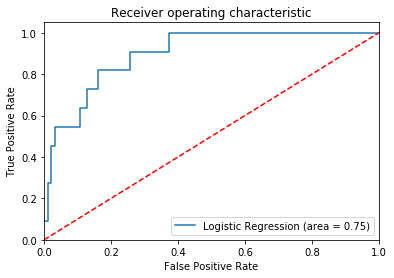

['pr', 'tas']
0
[[10.70766039 -0.01638341]]
[0.17400081]
Accuracy of logistic regression classifier on test set: 0.91
log loss: 0.2434
0.7514506769825919


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


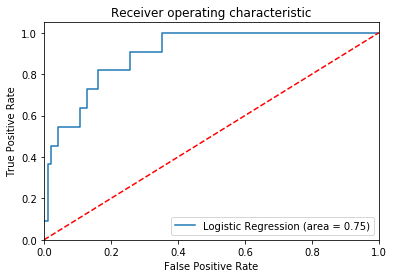

['pr', 'tdps']
0
[[10.95072375 -0.01561736]]
[-0.29046938]
Accuracy of logistic regression classifier on test set: 0.91
log loss: 0.2431
0.7514506769825919


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


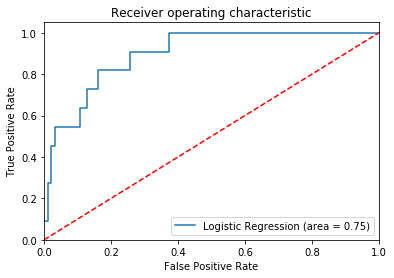

In [232]:

y_test = y_testT
y_train  =y_trainT


varname=['pr' ]   
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
# logreg = LogisticRegression()
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.coef_)
print(logreg.intercept_)
print(logreg.solver)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas'    ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



In [233]:
ds_merged

<xarray.Dataset>
Dimensions:   (T: 210, lat: 11, lon: 14)
Coordinates:
  * lon       (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat       (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 39.0 40.0 41.0 42.0
  * T         (T) datetime64[ns] 1999-06-03T12:00:00 ... 2014-08-28T12:00:00
Data variables:
    apcp      (T, lat, lon) float32 0.03734105 0.17766067 ... 0.36307195
    pr        (T, lat, lon) float32 3.193091e-06 6.373427e-06 ... 5.0202274e-05
    tas       (T, lat, lon) float32 301.90967 301.3548 ... 297.4843 297.3762
    tdps      (T, lat, lon) float32 281.5033 286.49457 ... 294.12543 294.13937
    apcp_rep  (T, lat, lon) float32 0.03734105 0.17766067 ... 0.36307195

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, wa

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

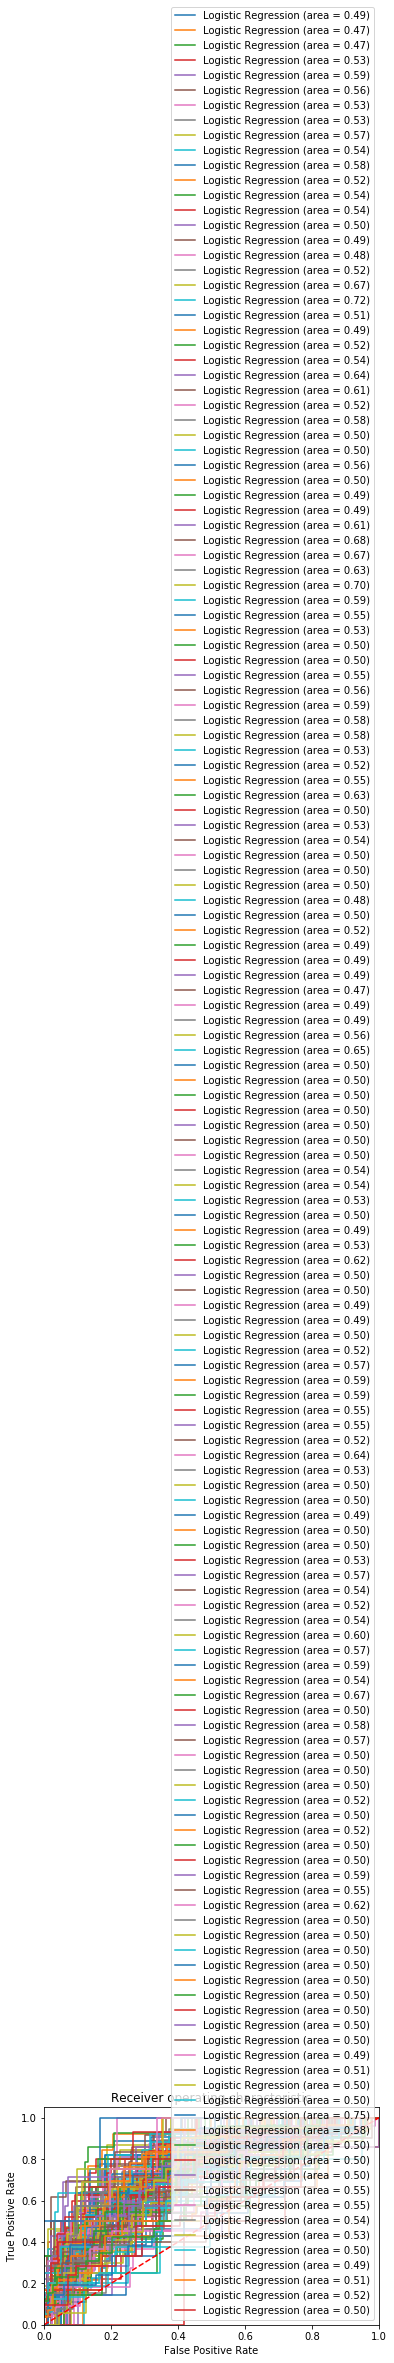

In [235]:
coefvalues = np.zeros((len(np.arange(32, 43)),len(np.arange(257, 271))))
aucvalues = np.zeros((len(np.arange(32, 43)),len(np.arange(257, 271))))
plt.figure()

for ilat, latx in enumerate(np.arange(32, 43)):
    for ilon, lonx in enumerate(np.arange(257, 271)):
        df_temp = df_merged[(df_merged.lat==latx)&(df_merged.lon==lonx)].dropna()
        
        X = df_temp[['pr','tas','tdps']]
        y = df_temp.loc[:, df_temp.columns == 'y']
        X['const']=1
        X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)
        y_train  =y_trainT
        
        
#         whichytest = y_testT.index
#         df_merged_test = df_temp.loc[whichytest]
#         ds_merged_test = df_merged_test.set_index(['M','T']).to_xarray().mean('M')
#         del df_merged_test
#         df_merged_test = ds_merged_test.to_dataframe()
#         df_merged_test = df_merged_test.reset_index()
#         df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_all
#         X_testT = df_merged_test[['pr','tas','tdps','cape','logcape']]
#         y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
#         X_testT['const']=1
#         y_testT = y_testT.loc[X_testT.dropna().index]
#         X_testT = X_testT.dropna()
        y_testT = y_testT.astype(int)
        y_test = y_testT*1.



        varname=['pr' ]   
        X_train = X_trainT[varname]
        X_test = X_testT[varname]
        # logreg = LogisticRegression()
        logreg = LogisticRegression(C=1e8)
        logreg.fit(X_train, y_train)
        logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
        coefvalues[ilat,ilon]= logreg.coef_
        aucvalues[ilat,ilon]= logit_roc_auc
#         print(logreg.intercept_)
#         print(logreg.solver)
#         y_pred = logreg.predict(X_test)
#         print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
#         print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

#         logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#         print(logit_roc_auc)
        fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
        plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")





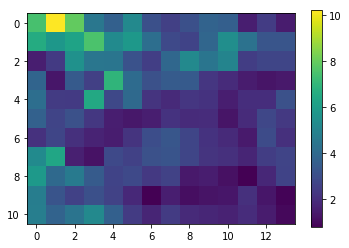

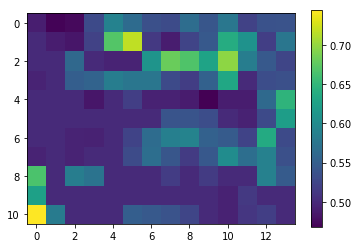

In [236]:
plt.figure()
plt.imshow(coefvalues)
plt.colorbar()
plt.figure()
plt.imshow(aucvalues)
plt.colorbar()